In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.consignes{
  font-weight: bold;
  color: #3256a8;
  background-color: #edebdf
}
</style>
""")

# <div class=consignes>Deep Learning et traitement du signal TP 1 </div>
<div class=consignes> L'objectif de ce TP est de prendre en main les outils de modélisation et d'analyse du signal présentés dans le premier cours et d'introduire la problématique de <it>détection</it> dont on parlera dans le cours numéro 3 </div>
<div class=consignes>Deadline : 18 octobre 2023, 11h59, par mail à deepetsignal.mva@gmail.com <br> Effort estimé : 2 à 3 heures maximum</div>
<div class=consignes>Le rendu de ce TP n'est pas obligatoire. Il permet d'obtenir un bonus de 1 (minimum syndical) à 3 (votre notebook servira de correction l'an prochain) points sur la moyenne des TP </div>

<div class=consignes> Listez les noms des étudiants (2 au maximum) ayant participé à ce notebook dans la cellule suivante (prénom, nom).<br/>
Au moment du rendu, le notebook doit être nommé nom1_nom2_dlts_tp1.ipynb </div>

Adib HABBOU, Steven ZHENG

<div class=consignes>Si vous installez des paquets supplémentaires, merci de les lister dans la cellule suivante avec la syntaxe
    
```
!pip install \< nom_du_paquet \>
```
    
</div>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy
import IPython.display as ipd
import warnings

## <div class=consignes>Partie 1: Audio </div>

### <div class=consignes>Visualisation</div>

 <div class=consignes>Enregistrez un fichier wav de quelques secondes de votre voix.
  <br>
 Importez le avec scipy.io.wavfile.read et écoutez le dans le notebook avec IPython.display.Audio
</div>

In [3]:
rate, data = scipy.io.wavfile.read('coloniedefourmies_16k.wav')
ipd.Audio(data, rate=rate)

<div class=consignes>Visualisez la forme d'onde temporelle de ce signal audio. <br>
Estimez et affichez sa Densité Spectrale de Puissance. <br>
Donnez une interprétation de ce que vous observez.
    </div>

In [7]:
def plot_forme_onde(data, rate):
    plt.figure(figsize=(12, 4))
    time = np.arange(len(data)) / rate
    plt.plot(time, data)
    plt.title('Forme d\'Onde Temporelle')
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

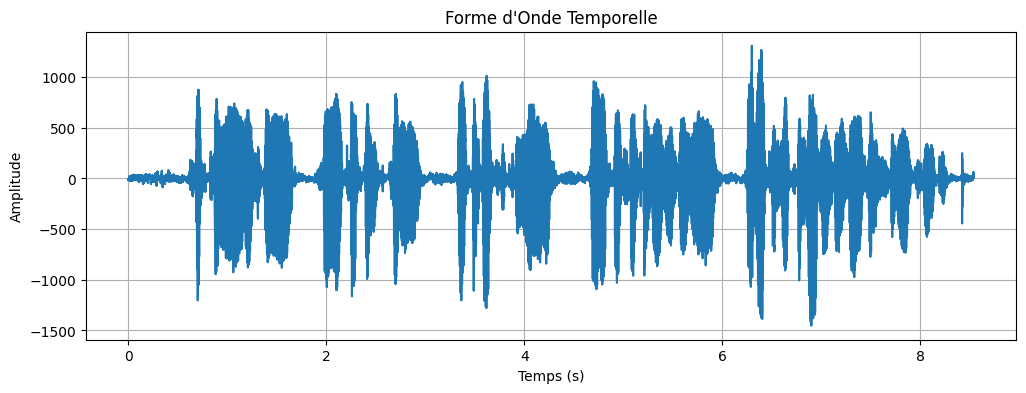

In [8]:
plot_forme_onde(data, rate)

In [10]:
def plot_densite_spectrale(data, rate):
    X = plt.fft(data)/rate
    f = plt.fftfreq(data.size,d=1/rate)

    X_positive = X[f >= 0]
    f_positive = f[f >= 0]

    plt.figure(figsize=(12, 6))
    plt.plot(f_positive, np.abs(X_positive))
    plt.title('DSP du Signal Audio')
    plt.xlabel('Fréquence (Hz)')
    plt.ylabel('DSP')
    plt.xlim([0, 2000])
    plt.grid(True)
    plt.show()

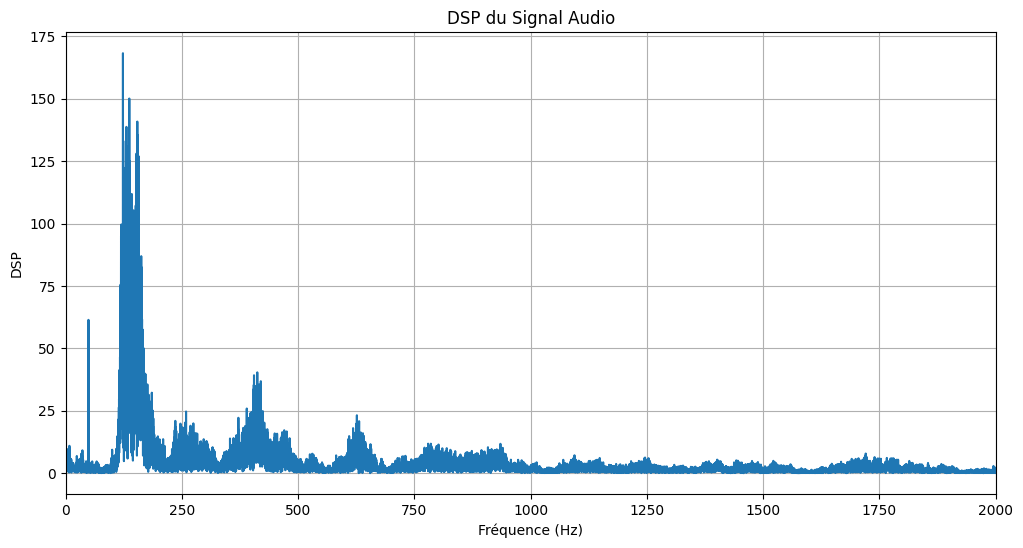

In [11]:
plot_densite_spectrale(data, rate)

In [12]:
def plot_periodogramme_welch(data, rate):
    fig, axs = plt.subplots(1, 2, figsize = (10, 4))

    frequencies_periodogram, power_spectrum_periodogram = scipy.signal.periodogram(data, fs = rate)

    axs[0].semilogy(frequencies_periodogram, power_spectrum_periodogram)
    axs[0].set_title('Periodogramme')
    axs[0].set_xlabel('Fréquence (Hz)')
    axs[0].set_ylabel('Puissance/Fréquence (dB/Hz)')
    axs[0].grid(True)

    frequencies_welch, power_spectrum_welch = scipy.signal.welch(data, fs = rate, nperseg = 1024)

    axs[1].semilogy(frequencies_welch, power_spectrum_welch)
    axs[1].set_title('Welch')
    axs[1].set_xlabel('Fréquence (Hz)')
    axs[1].set_ylabel('Puissance/Fréquence (dB/Hz)')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

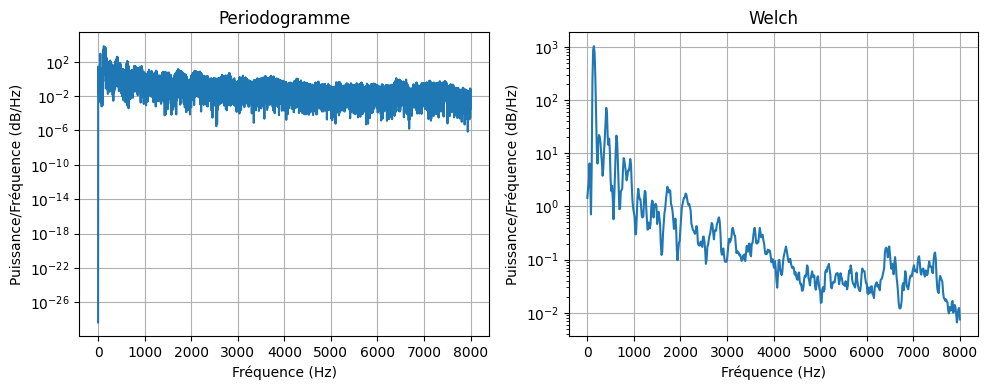

In [13]:
plot_periodogramme_welch(data, rate)

On remarque que la forme d'onde contient des passages d'amplitude nulle ce qui correspond aux pauses lors de la parole.

De plus l'amplitude du signale reste relativement la même ce qui se traduit par une voix qui garde la même "monotonie".

Pour la DSP, on a une fréquence entre 100Hz et 8kHz ce qui est la plage générale de fréquence d'une voie humaine.

On a, de plus, que la majeure partie de l'énergie est concentrée dans la partie inférieure de cette plage c'est-à-dire entre 100 Hz et 1 kHz.


<div class=consignes> Calculez et affichez le spectrogramme du signal. <br>
Justifiez du choix des réglages que vous avez faits. <br>
Sélectionnez une portion pertinente du spectrogramme pour estimer visuellement le pitch de votre voix.
    </div>

In [39]:
def plot_spectrogramme(data, rate, nperseg, nfft):
    f, t, Zxx = scipy.signal.stft(data, fs=rate, nperseg=nperseg, nfft=nfft, noverlap=nperseg//2, window='hamming')
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='auto', cmap='viridis')
    plt.title('Spectrogramme du Signal Audio')
    plt.xlabel('Temps (s)')
    plt.ylabel('Fréquence (Hz)')
    plt.colorbar(label='Amplitude')
    plt.grid(True)
    plt.ylim([0, rate/8])
    plt.show()

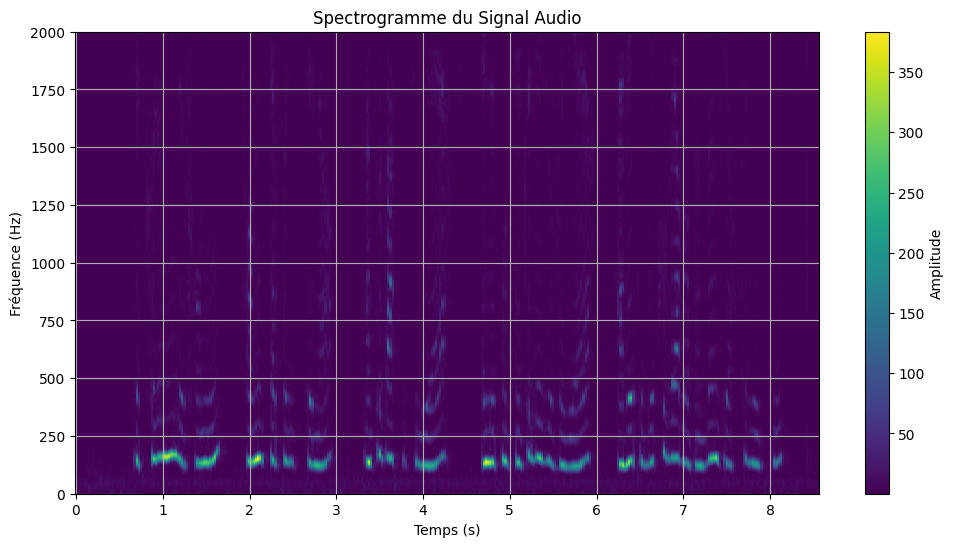

In [40]:
plot_spectrogramme(data, rate, nperseg=rate*0.05, nfft=rate)

On choisit nperseg (le nombre d'échantillons dans la fenêtre) comme 5% de la fréquence d'échantillonnage (rate).

Cela signifie qu'on utilise une fenêtre relativement courte, ce qui permet de détecter des détails plus fins dans le signal.

On choisit nfft (le nombre de fréquences calculées par fenêtre) comme égale à la fréquence d'échantillonage (rate).

Cela signifie qu'on peut distinguer les composantes fréquentielles plus fines dans notre signal.

On choisist un chevauchement qui est la moitié de la longueur de la fenêtre (nperseg).

Cela permet un bon compromis entre la résolution temporelle et la résolution fréquentielle.

In [41]:
def plot_portion_spectrogramme(data, rate, nperseg, nfft, xlim, ylim):
    f, t, Zxx = scipy.signal.stft(data, fs=rate, nperseg=nperseg, nfft=nfft, noverlap=nperseg//2, window='hamming')
    plt.figure(figsize=(12, 6))
    plt.pcolormesh(t, f, np.abs(Zxx), shading='auto', cmap='viridis')
    plt.title('Portion du Spectrogramme du Signal Audio')
    plt.xlabel('Temps (s)')
    plt.ylabel('Fréquence (Hz)')
    plt.colorbar(label='Amplitude')
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

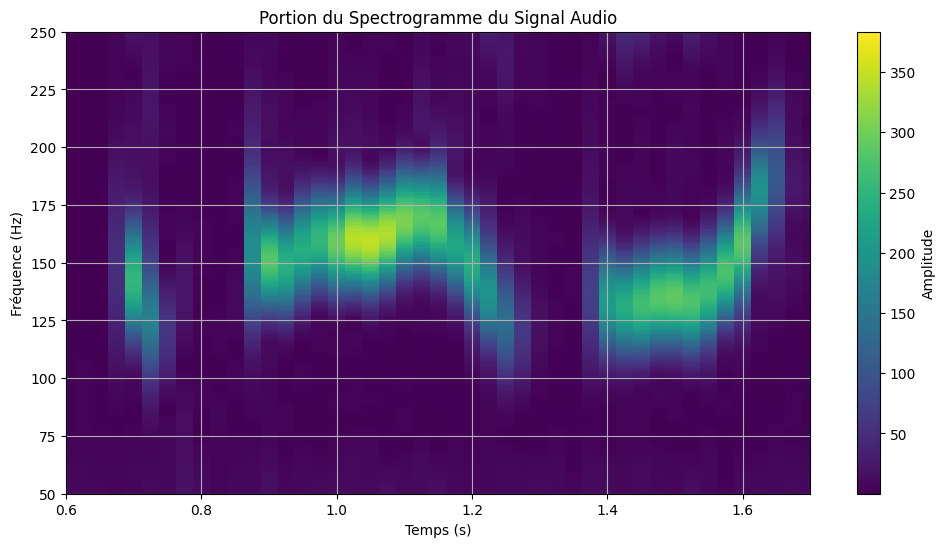

In [46]:
plot_portion_spectrogramme(data, rate, nperseg=rate*0.05, nfft=rate, xlim=[0.6,1.7], ylim=[50,250])

On peut estimer visuellement, d'après la portion du spectrogramme ci-dessus, que le pitch se situe entre 125 et 150 Hz.

### <div class=consignes>Calcul du Pitch</div>

<div class=consignes>Proposez une méthode simple pour estimer automatiquement le Pitch de votre voix (cette méthode ne doit pas faire intervenir d'implémentations externes).

Utilisez cette méthode pour estimer les variations du Pitch le long du signal, estimez le pitch toutes les 20 ms et présentez vos résultats sous forme visuelle.

Commentez.
    </div>

On calcule le pitch d'un signal audio en effectuant une transformée de Fourier à court terme (STFT) pour extraire les fréquences dominantes.

Les fréquences dominantes étant celles correspondantes aux amplitudes les plus élevées dans chaque segment temporel.

Ensuite, on peut estime le pitch en prenant la moyenne de ces fréquences.

In [89]:
def plot_pitch(data, rate):
    # Paramètres STFT
    window_size = int(rate * 0.02)  # Fenêtre de 20 ms
    overlap = int(rate * 0.01)  # Chevauchement de 10 ms

    # STFT
    frequencies, times, Zxx = scipy.signal.stft(
        data, fs=rate, nperseg=window_size, noverlap=overlap, return_onesided=True
    )

    # Initier des listes pour stocker les indices d'amplitude max et les fréquences associées
    max_indices = []
    max_frequencies = []

    # Boucle à travers chaque colonne (fenêtre temporelle) de Zxx
    for i in range(Zxx.shape[1]):
        # Obtenir l'amplitude (magnitude) du spectrogramme pour la fenêtre actuelle
        magnitude = np.abs(Zxx[:, i])

        # Garder les fréquences qui sont entre 20 et 1000 Hz pour éviter des valeures abérrantes
        valid_indices = np.where((frequencies < 1000) & (frequencies > 20))[0]
        magnitude = magnitude[valid_indices]

        # Trouver l'indice de l'amplitude maximale et la fréquence correspondante
        index_max = np.argmax(magnitude)
        frequency_max = frequencies[valid_indices][index_max]

        # Ajouter les valeurs à leurs listes respectives
        max_indices.append(index_max)
        max_frequencies.append(frequency_max)

    # Calculer le pitch
    pitch = round(np.mean(max_frequencies))

    # Visualisation
    plt.figure(figsize=(8, 5))
    plt.plot(times, max_frequencies)
    plt.axhline(y=pitch, color='r', linestyle='--', linewidth=2, label=f'Pitch = {pitch} Hz')
    plt.xlabel('Temps (s)')
    plt.ylabel('Amplitude')
    plt.title('Amplitude Maximale au cours du temps')
    plt.grid(True)
    plt.legend(loc='upper center', fontsize='large')
    plt.tight_layout()
    plt.show()

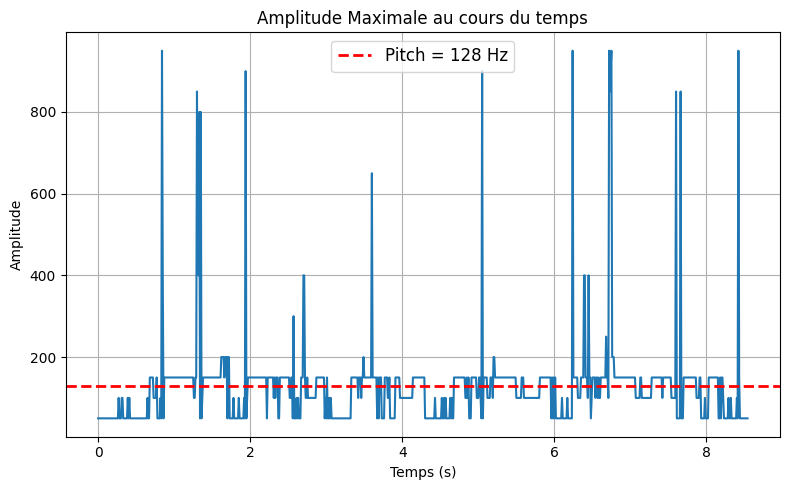

In [90]:
plot_pitch(data, rate)

On retrouve un pitch égale à 128 Hz qui est donc compris entre 70 et 250 Hz ce qui correspond à la voix d'un homme.

## <div class=consignes>Partie 2: Détection d'impulsion </div>

<div class=consignes> Un signal de durée 1 seconde et échantillonné à 1000 Hz est composé d'un bruit blanc gaussien de puissance inconnue et éventuellement d'une impulsion à une fréquence f0 comprise entre 100 et 200 Hz.
<br><br>
Une série de 1000 signaux est enregistrée dans le fichier signaux_impulsions.npz.
Ouvez ce fichier avec numpy (cf code plus bas). Le fichier contient une tableau signaux 10000 x 1000 dont chaque ligne contient un signal de durée 1000. Le fichiez contient aussi un tableau labels de taille 10000 dont la ligne i est à TRUE si le signal i contient une impulsion et à 0 sinon.

</div>

In [72]:
donnees = np.load('signaux_impulsions.npz')
signaux = donnees['data']
labels = donnees['labels']

## <div class=consignes> Première méthode </div>

<div class=consignes> Proposez une méthode simple  pour décider si un signal contient une impulsion ou non à partir du calcul de l'énergie du signal. Cette méthode fera intervenir un seuil:
</div>

```python
def contient_impulsion_energie(signal: np.ndarray, seuil: float) -> bool:
```

In [73]:
def contient_impulsion_energie(signal: np.ndarray, seuil: float):
    return np.sum(signal**2) > seuil

Cette méthode prend un signal en entrée et calcule son énergie en prenant la somme des carrés des échantillons.

Elle retourne True si cette énergie est supérieure à un seuil spécifié, et False sinon.

<div class=consignes>
Utilisez votre méthode avec un seuil fixé sur tous les signaux pour prédire s'ils contiennent une impulsion ou non.
</div>

In [77]:
def prediction_impulsion_energie(singaux, seuil):
    return np.array([contient_impulsion_energie(signal, seuil) for signal in signaux], dtype=float)

In [82]:
prediction_impulsion_energie(signaux, seuil=100)

array([1., 1., 1., ..., 1., 1., 1.])

<div class=consignes>
Calculez: <br>
- VP = le nombre de signaux que vous détectez comme contenant une impulsion qui contiennet effectivement une impulsion <br>
- FP = le nombre de signaux que vous détectez comme contenant une impulsion qui ne contiennet en fait PAS une impulsion <br>
- VN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion qui ne contiennet effectivement PAS une impulsion<br>
- FN = le nombre de signaux que vous détectez comme ne contenant PAS une impulsion mais qui  contiennet en fait une impulsion
</div>

In [100]:
def classification_stats(predictions, labels):
    VP = np.sum((predictions == 1) & (labels == 1))
    FP = np.sum((predictions == 1) & (labels == 0))
    VN = np.sum((predictions == 0) & (labels == 0))
    FN = np.sum((predictions == 0) & (labels == 1))

    stats_dict = {
        'Vrais Positifs (VP)': [VP],
        'Faux Positifs (FP)': [FP],
        'Vrais Négatifs (VN)': [VN],
        'Faux Négatifs (FN)': [FN]
    }

    df = pd.DataFrame(stats_dict)
    df.index = ['']
    return df

In [101]:
classification_stats(prediction_impulsion_energie(signaux, seuil=100), labels)

,Vrais Positifs (VP),Faux Positifs (FP),Vrais Négatifs (VN),Faux Négatifs (FN)
,4629,3227,1769,375


En général, on cherche un équilibre entre les VP et les FP, ainsi qu'entre les VN et les FN.

Idéalement, vous voudriez maximiser les VP et VN tout en minimisant les FP et FN.

Le choix du seuil dépendra de la tolérance qu'on a aux faux positifs et faux négatifs dans notre application spécifique.

## <div class=consignes>Deuxième méthode </div>

<div class=consignes>Proposez une deuxième méthode faisant par exemple intervenir le spectrogramme du signal. Cette méthode fera encore intervenir un seuil
</div>

```python
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
```


In [102]:
def contient_impulsion_spectrogramme(signal: np.ndarray, seuil: float) -> bool:
    f, t, Sxx = scipy.signal.spectrogram(signal)
    frequence_min = 0
    frequence_max = 1000
    indice_frequence_min = np.where(f >= frequence_min)[0][0]
    indice_frequence_max = np.where(f <= frequence_max)[0][-1]
    energie_bande = np.sum(Sxx[indice_frequence_min:indice_frequence_max, :], axis=0)
    return np.max(energie_bande) >= seuil

En résumé, cette méthode prend un signal en entrée, génère son spectrogramme, calcule l'énergie dans une bande de fréquence spécifiée.

Elle retourne True si l'énergie maximale dans cette bande dépasse le seuil donné, sinon elle retourne False.

In [104]:
def prediction_impulsion_spectrogramme(singaux, seuil):
    return np.array([contient_impulsion_spectrogramme(signal, seuil) for signal in signaux], dtype=float)

In [105]:
prediction_impulsion_spectrogramme(signaux, seuil=100)

array([0., 1., 0., ..., 0., 0., 0.])

<div class=consignes> Calculez pour cette nouvelle méthode, pour un certain seuil les valeurs de VP, FP, VN, FN </div>

In [106]:
classification_stats(prediction_impulsion_spectrogramme(signaux, seuil=100), labels)

,Vrais Positifs (VP),Faux Positifs (FP),Vrais Négatifs (VN),Faux Négatifs (FN)
,3395,849,4147,1609


## <div class=consignes> Comparaison des méthodes </sdivs>

<div class=consignes>Pour une méthode de détection et un seuil donné, la précision est définie comme:
$$ \frac{VP}{VP + FP}$$
et le rappel comme:
$$ \frac{VP}{VP +FN} $$
    
</div>

<div class=consignes> Donnez une interprétation de ces deux métriques </div>

La précision mesure la proportion de vrais positifs (VP) parmi toutes les prédictions positives (VP + FP).

Elle répond à la question : "Parmi tous les exemples que le modèle a prédits comme positifs, combien sont réellement positifs ?"

Le rappel mesure la proportion de vrais positifs (VP) parmi tous les exemples réellement positifs (VP + FN).

Il répond à la question : "Parmi tous les exemples qui sont réellement positifs, combien le modèle a-t-il correctement prédits comme tels ?"

Ensemble ils fournissent un équilibre entre la capacité du modèle à éviter les faux positifs et à détecter correctement les vrais positifs.

<div class=consignes>
    Pour chacune des deux méthodes proposées, faites varier le seuil sur une dizaine de valeurs et calculez la précision et le rappel pour chacun de ces seuils.

Affichez dans le plan (précision , rappel) les points de fonctionnement des deux méthodes pour différents seuils. <br>Commentez le résultat.
    </div>

In [127]:
def plot_pr_curve(signaux, labels):
    seuils = list(range(10, 1000, 10))

    precision_energie_list = []
    precision_spectrogramme_list = []
    recall_energie_list = []
    recall_spectrogramme_list = []

    for seuil in seuils:
        predictions_energie = prediction_impulsion_energie(signaux, seuil)
        predictions_spectrogramme = prediction_impulsion_spectrogramme(signaux, seuil)

        stats_energie = classification_stats(predictions_energie, labels)
        stats_spectrogramme = classification_stats(predictions_spectrogramme, labels)

        precision_energie = stats_energie.loc['', 'Vrais Positifs (VP)'] / (stats_energie.loc['', 'Vrais Positifs (VP)'] + stats_energie.loc['', 'Faux Positifs (FP)'])
        precision_spectrogramme = stats_spectrogramme.loc['', 'Vrais Positifs (VP)'] / (stats_spectrogramme.loc['', 'Vrais Positifs (VP)'] + stats_spectrogramme.loc['', 'Faux Positifs (FP)'])

        recall_energie = stats_energie.loc['', 'Vrais Positifs (VP)'] / (stats_energie.loc['', 'Vrais Positifs (VP)'] + stats_energie.loc['', 'Faux Négatifs (FN)'])
        recall_spectrogramme = stats_spectrogramme.loc['', 'Vrais Positifs (VP)'] / (stats_spectrogramme.loc['', 'Vrais Positifs (VP)'] + stats_spectrogramme.loc['', 'Faux Négatifs (FN)'])

        precision_energie_list.append(precision_energie)
        precision_spectrogramme_list.append(precision_spectrogramme)

        recall_energie_list.append(recall_energie)
        recall_spectrogramme_list.append(recall_spectrogramme)

    plt.figure(figsize=(10, 6))
    plt.plot(recall_energie_list, precision_energie_list, label='Énergie')
    plt.plot(recall_spectrogramme_list, precision_spectrogramme_list, label='Spectrogramme')
    plt.xlabel('Rappel')
    plt.ylabel('Précision')
    plt.title('PR curve')
    plt.legend()
    plt.show()

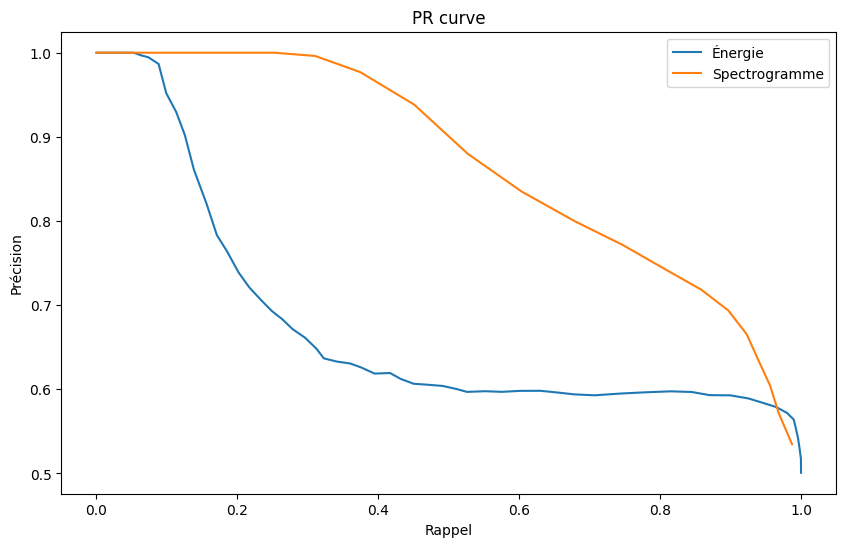

In [128]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
plot_pr_curve(signaux, labels)

D'après la PR curve on peut dire que la deuxième méthode est meilleure que la première méthode pour détecter les impulsions dans le signal.

In [129]:
def plot_roc_curve(signaux, labels):
    seuils = list(range(10, 1000, 10))

    FPR_energie_list = []
    FPR_spectrogramme_list = []
    TPR_energie_list = []
    TPR_spectrogramme_list = []

    for seuil in seuils:
        predictions_energie = prediction_impulsion_energie(signaux, seuil)
        predictions_spectrogramme = prediction_impulsion_spectrogramme(signaux, seuil)

        stats_energie = classification_stats(predictions_energie, labels)
        stats_spectrogramme = classification_stats(predictions_spectrogramme, labels)

        FPR_energie = stats_energie.loc['', 'Faux Positifs (FP)'] / (stats_energie.loc['', 'Faux Positifs (FP)'] + stats_energie.loc['', 'Vrais Négatifs (VN)'])
        FPR_spectrogramme = stats_spectrogramme.loc['', 'Faux Positifs (FP)'] / (stats_spectrogramme.loc['', 'Faux Positifs (FP)'] + stats_spectrogramme.loc['', 'Vrais Négatifs (VN)'])
        TPR_energie = stats_energie.loc['', 'Vrais Positifs (VP)'] / (stats_energie.loc['', 'Vrais Positifs (VP)'] + stats_energie.loc['', 'Faux Négatifs (FN)'])
        TPR_spectrogramme = stats_spectrogramme.loc['', 'Vrais Positifs (VP)'] / (stats_spectrogramme.loc['', 'Vrais Positifs (VP)'] + stats_spectrogramme.loc['', 'Faux Négatifs (FN)'])

        FPR_energie_list.append(FPR_energie)
        FPR_spectrogramme_list.append(FPR_spectrogramme)
        TPR_energie_list.append(TPR_energie)
        TPR_spectrogramme_list.append(TPR_spectrogramme)

    plt.figure(figsize=(10, 6))
    plt.plot(FPR_energie_list, TPR_energie_list, label='Énergie')
    plt.plot(FPR_spectrogramme_list, TPR_spectrogramme_list, label='Spectrogramme')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('ROC curve')
    plt.legend()
    plt.show()

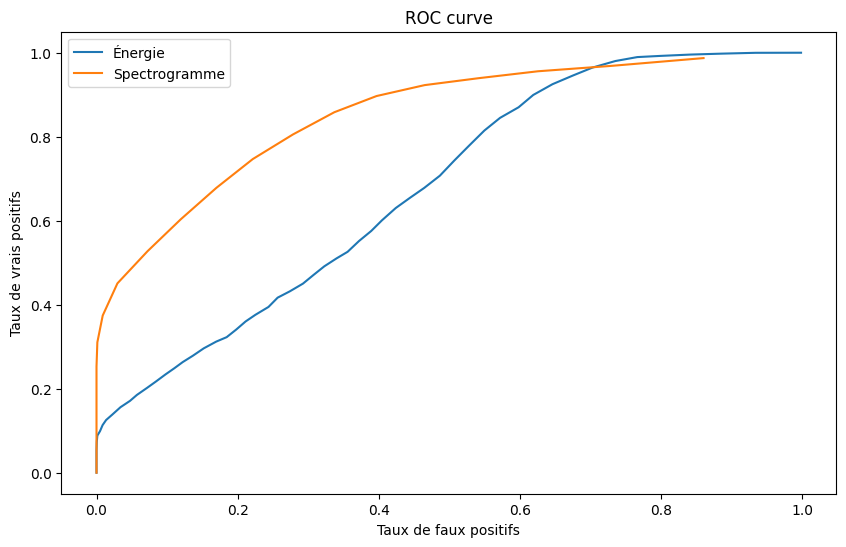

In [130]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
plot_roc_curve(signaux, labels)

  La ROC curve confirme notre conclusion précédente : la deuxième méthode est meilleure que la première pour la détection d'impulsion.